In [2]:
!pip install numpy
import numpy as np

X_train=np.load('O_vowel/X_train.npy')
Xtest=np.load('O_vowel/X_test.npy')

X_train = np.stack(X_train)
Xtest = np.stack(Xtest)

In [3]:
import csv

with open('O_vowel/y_train.csv', newline='') as f:
    reader = csv.reader(f)
    Y_train = list(reader)

print(Y_train)
Y_train.pop(0)
print(Y_train)

with open('O_vowel/y_test.csv', newline='') as f:
    reader = csv.reader(f)
    Y_test = list(reader)

print(len(Y_test))
Y_test.pop(0)

!pip install sklearn
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y_train)

Y_train = encoder.transform(Y_train).reshape([len(Y_train), 1])

encoder = LabelEncoder()
encoder.fit(Y_test)

Y_test = encoder.transform(Y_test).reshape([len(Y_test), 1])

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
Xtest = Xtest.reshape(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2],1)



print(X_train.shape)
print(Xtest.shape)
print(Y_train.shape)
print(Y_test.shape)

[['label'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Positive'], ['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negative'], ['Negati

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
#importing the keras modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GRU,BatchNormalization
from keras import regularizers
from keras.constraints import unit_norm
import tensorflow as tf

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(X_train.shape[1:])))
Dropout(0.25),
model.add(Conv2D(64, kernel_size=(3, 3),strides=(2,2), activation='relu',padding='same')),
model.add(MaxPooling2D((2, 2)))
BatchNormalization()


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


'''
Optimizer = Adam
Loss = binary_crossentropy
'''
optimiser = tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
model.summary()

history = model.fit(X_train, Y_train, validation_data=(Xtest, Y_test),batch_size=32,epochs=15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 172, 32)      320       
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 86, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 88064)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               11272320  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

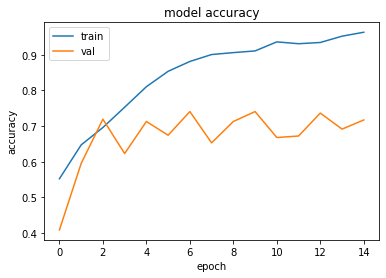

In [7]:
!pip install matplotlib
from matplotlib import pylab

pylab.plot(history.history['accuracy'])
pylab.plot(history.history['val_accuracy'])
pylab.title('model accuracy')
pylab.ylabel('accuracy')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()

In [8]:
print("saving model")
model.save('models/vowel_O_model')

saving model
INFO:tensorflow:Assets written to: models/vowel_O_model\assets


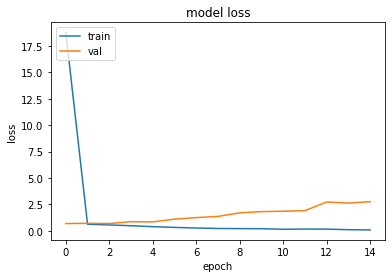

In [9]:
pylab.plot(history.history['loss'])
pylab.plot(history.history['val_loss'])
pylab.title('model loss')
pylab.ylabel('loss')
pylab.xlabel('epoch')
pylab.legend(['train', 'val'], loc='upper left')
pylab.show()

In [10]:
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# extract the predicted probabilities
p_pred = model.predict(Xtest)
p_pred = p_pred.flatten()
# print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
# print(y_pred)
# [1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 ...

cf_matrix=confusion_matrix(Y_test, y_pred)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(Y_test,y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       365
           1       0.34      0.31      0.33       102

    accuracy                           0.72       467
   macro avg       0.58      0.57      0.57       467
weighted avg       0.71      0.72      0.71       467



<AxesSubplot:>

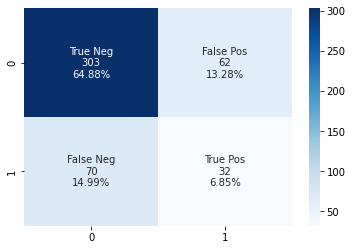

In [11]:
!pip install seaborn
import seaborn as sns


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')